 # Anchos de banda 

Muestra

In [1]:
b=c(20.9,18.2,20,17.3,19.6,13.6,24.9,26.9,23.5,21.8,17,20.4,24.6,22.6,21.2,19.6,14.6,24.4,21.8,18.4,24.8,28.5,11.9,10,25.7,27.2,24.4,30.1,21.6,26,14.6,26.1,22.1,8.4,16.4,19.6,19.6,21.5,20.2,25.2,26.7,22.3,22.9,19.9,16.5,14.1,20.4,16.6,19.1,25.5,16.2,24.7,20,28.4,24.4,15.8,25.6,22.5,17.2,15.8,15.1,16.2,19.9,27.3,22.3,19.3,11.7,14.4,24.5,21.6,12.4,15.9,23.5,22.8,26.6,31,22.2,21.7,25.1,28.8,22.8,21.3,24.5,13.8,14.3,23.6,13.3,28.6,22.9,13.7,15.4,13.1,28.8,11.2,22.3,21.9,11.2,21.2,18.7,15)
n=length(b)

## Anchos de banda fijos 

Librería para hcv

In [2]:
install.packages("sm")
library("sm")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Package 'sm', version 2.2-5.6: type help(sm) for summary information


### Ancho de banda para Kernell normal 

In [3]:
DE=sd(b)
h.N=(1.06*DE)/(n^(1/5));h.N
hnorm(b)

[1] 2.131735

[1] 2.130174

### Ancho de banda de Silverman

In [4]:
RI =(summary(b)[5]-summary(b)[2])/1.349
A=min(DE,RI)

h.S=(0.9*A)/(n^(1/5));h.S
density(b)$bw

[1] 1.809964

[1] 1.809964

### Over smooth bandwidth 

In [5]:
h.os =(1.144 *DE) /n^(1/5);h.os

[1] 2.300665

### Cross-validation Bandwidth 

Falta obtenerla por método manual.

[1] 2.286215

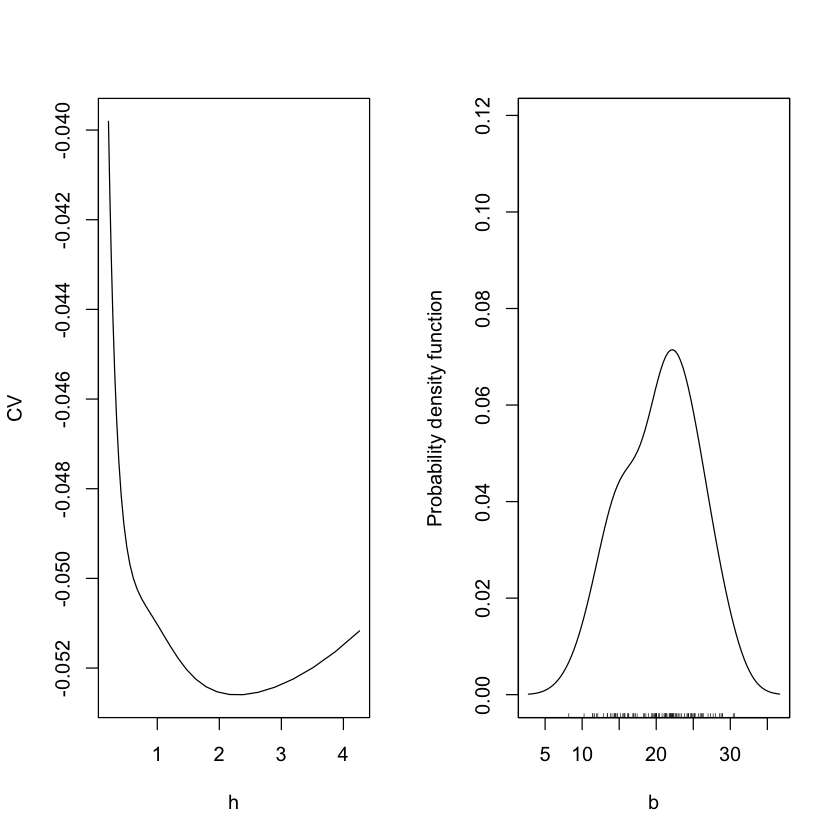

In [6]:
par(mfrow=c(1,2))
h.LSCV <- hcv(b,display="linea", ngrid=32);h.LSCV
sm.density(b,h=h.LSCV)
par(mfrow=c(1,1))

### Plug-In bandwidth 

In [7]:
h.PI=hsj(b);h.PI

[1] 2.086989

### Validación cruzada por máxima verosimilitud 

In [ ]:
Estimación utilizando Kernel Normal para la estimación de un solo $x$

In [8]:
kerNorm = function(xx,xi,hh){
  nn=length(xi)
  zz=(xx-xi)/hh
  kk=(1/(2*pi)^0.5*exp(-0.5*zz*zz))
  fes=sum(kk)/(hh*nn)
  return(fes)
}

In [9]:
## Como ejercicio no utilizar kerNorm sino density
LCV = function(h.mv){
  LCVh=0
  ind=1:n
  for(i in 1:n){
    fi=kerNorm(b[i],b[ind!=i],h.mv)
    LCVh=LCVh+log(fi)
  }
  LCVv=-LCVh
}

In [10]:
h.MVCV = optimize(LCV,hbt, lower=1.5 , upper=4)$minimum;h.MVCV

h.MVCV = optimize(LCV,h.S, lower=1.5 , upper=4)$minimum;h.MVCV

[1] 1.926877

[1] 1.926877

### Método Bootstrap 

In [13]:
np = 500
points=density(b,n=np)$x;dx=points[2]-points[1];dx
fx=density(b,n=np,kernel="gaussian")$y    ## h_silverman
##  fx=density(b,n=np,kernel="gaussian",bw=h.os)$y    ## h_os
m=1000
booth=function(h){
  E=0
  for(j in 1:m){
    muestra=b[sample(1:n,replace=T)]
    fxb=density(muestra,bw=h,n=np,kernel="gaussian")$y
    E=E+dx*sum((fxb-fx)^2)
  }
  MISE=E/m
}
# Optim(1,boot)
solu=optimize(booth,1,lower=0.5,upper=4);solu
h.boot=solu$minimum;h.boot
nmise(sd(b),n,h.boot)


[1] 0.06705367

$minimum
[1] 2.257491

$objective
[1] 0.001257831

[1] 2.257491

[1] 0.001070925

### Resumen Bandwidth fijo 

In [14]:
h.boot;    ## Bootstrap
h.os;      ## Sobresuavizado
h.LSCV;    ## Validación cruzada LS
h.N;       ## Normal
h.PI;      ## Plug-in
h.MVCV;    ## Validación cruzada MV
h.S;       ## Silverman

[1] 2.257491

[1] 2.300665

[1] 2.286215

[1] 2.131735

[1] 2.086989

[1] 1.926877

[1] 1.809964

### Gráficas  

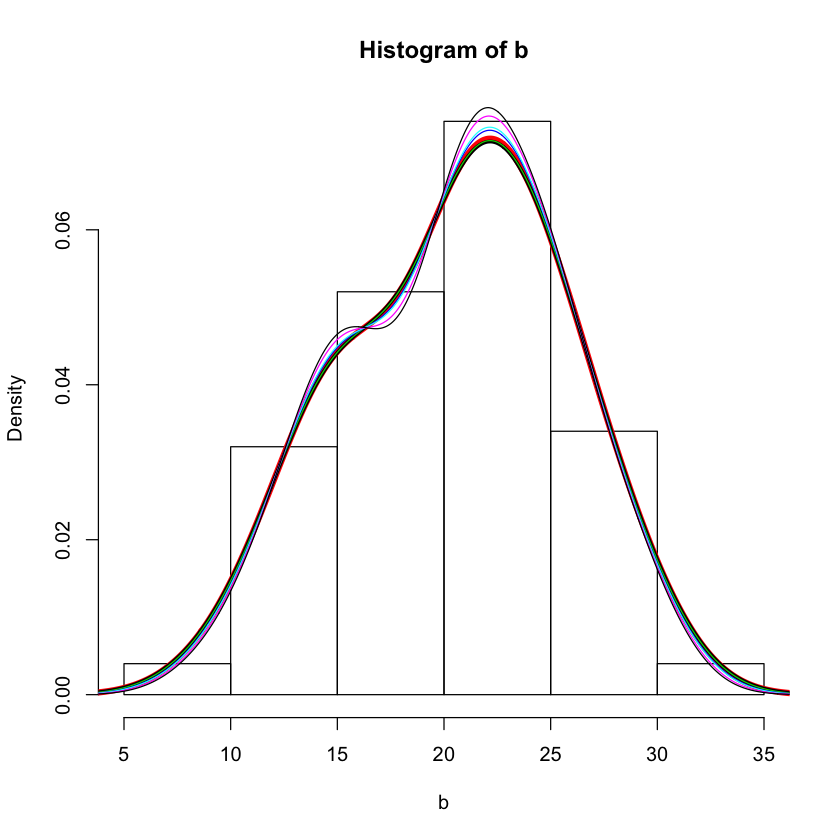

In [15]:
##Gráficas con h seleccionado
hist(b,prob="T")
lines(density(b,bw=h.boot ,kernel="gaussian"),col=2,lwd=5)    ## BOOTSTRAP
lines(density(b,bw=h.os   ,kernel="gaussian"),col=1,lwd=3)    ## SOBRESUAVIZADO
lines(density(b,bw=h.LSCV ,kernel="gaussian"),col=3)          ## VALIDACIÓN CRUZADA LS
lines(density(b,bw=h.N    ,kernel="gaussian"),col=4)          ## NORMAL
lines(density(b,bw=h.PI   ,kernel="gaussian"),col=5)          ## PLUG IN
lines(density(b,bw=h.MVCV ,kernel="gaussian"),col=6)          ## VALIDACIÓN CRUZADA MV
lines(density(b           ,kernel="gaussian"),col=9)          ## SILVERMAN

## Bandwidth variable 

Este método funciona bien, sin embargo en el caso de que no se recomienda probar con mixturas.

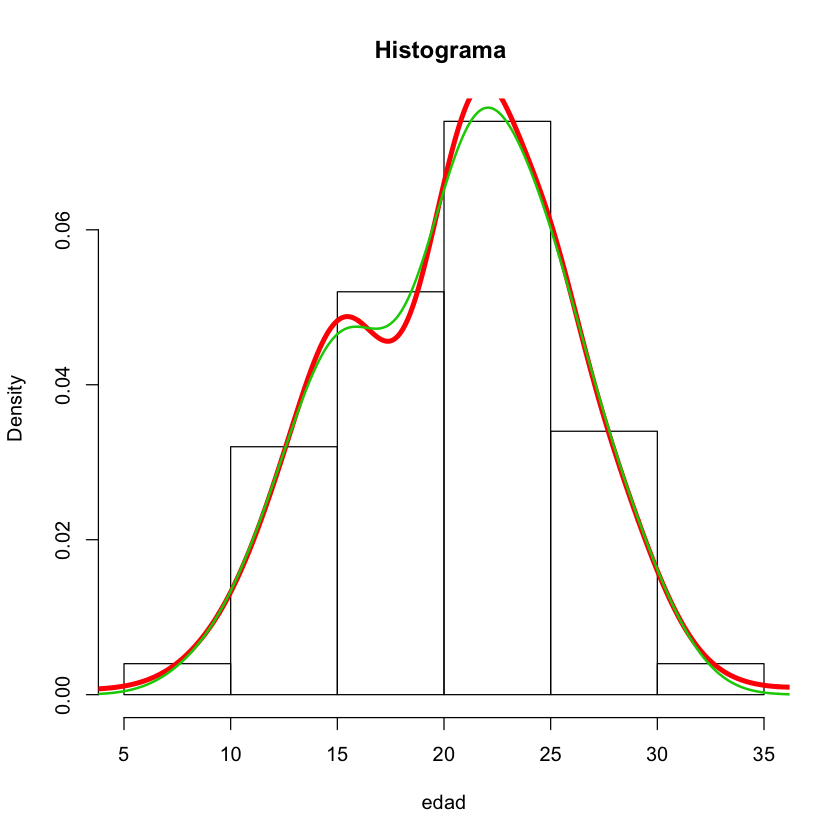

In [17]:
Den=density(b,kernel="gaussian")
fe=Den$y;points=Den$x;h.S=Den$bw
mg=exp(sum(log(fe))/length(fe));
alpha=0.1
hi=h.S*(fe/mg)^(-alpha);
fe2=NULL
for(i in 1:length(points)){
  z=(points[i]-b)/hi[i]
  k=(1/(2*pi)^0.5)*exp(-0.5*z*z)
  fe2[i]=sum(k)/(hi[i]*n)
}
hist(b,prob=TRUE,main=paste("Histograma "),xlab="edad")
lines(points,fe2,col=2,lwd=4)
lines(points,fe,col=3,lwd=2)


